# Jones Vectors

This is a sample notebook to perform basic calculations on the "Jones Calculus". The basis is chosen so that a jones vector is given by a <b>normalized</b> vector whose components represent the magnitude and phase of the $x$ and $y$ components of the electric field of a beam propagatin along $\textbf{k} = k\hat{z}$:

\begin{equation}
\textbf{j} = \vert{\textbf{E}}\vert^{-1} \left( \begin{array}{c} E_x \\ E_y \end{array} \right)
\end{equation}

The Jones vector is a class and right now it has very limited functionality: you define the polarization manually:

- Horizontal     = Jones(1,0)
- Vertical       = Jones(0,1)
- $\pm45^\circ$  = Jones(1,$\pm$1)
- Right Circular = Jones(1,1j)
- Left Circular  = Jones(1,-1j)

Rotating the polarization by angle 'theta' is accomplished by 

    rot_mat(theta)
    
which performs the rotation matrix:    

$$
R(\phi) \equiv \left(\begin{matrix} \cos\phi & -\sin\phi \\ \sin\phi & \cos\phi \end{matrix}\right)
$$

half-wave plates with fast axis horizontal are defined by

$$
H_0 \equiv e^{i\pi/2}\left(\begin{matrix} 1 & 0 \\ 0 & -1 \end{matrix}\right)
$$

and quarter wave plates as:

$$
Q_0 \equiv e^{i\pi/4}\left(\begin{matrix} 1 & 0 \\ 0 & -i \end{matrix}\right)
$$

Wave plates at arbitrary angles are then applied by rotating polarization into the basis defined by the wave-plate, applying the in-axis wave plate transformation, and rotating back into the "lab frame".

\begin{eqnarray}
Q(\theta) & = & R(\theta)Q_0R(-\theta) \\
H(\theta) & = & R(\theta)H_0R(-\theta)
\end{eqnarray}

There is also a primitive method to plot the polarization ellipses of an array of jones vectors via:
    j1 = Jones(1,2)
    #j2 = ...
    # jvecs = [j1,j2,...]
    plot_pol(j1) # plot a single Jones Vector
    plot_pols(jvecs) # plot an array of Jones Vectors

This couled easily be expanded upon.

In [1]:
%pylab inline
class Jones:
    def __init__(self, horiz=1, vert=0):
        mg =sqrt(abs(horiz)**2 + abs(vert)**2)
        self.h = horiz/mg
        self.v = vert/mg

        
    def rotmat(self,theta):
        return Jones(self.h*cos(theta) - self.v*sin(theta), self.v*cos(theta) + self.h*sin(theta))
    
    def hwp0(self):
        return Jones(self.h,-self.v)
    def qwp0(self):
        return Jones(self.h,1j*self.v)
    
    def hwp(self,theta):
        return self.rotmat(-theta).hwp0().rotmat(theta)
    def qwp(self,theta):
        return self.rotmat(-theta).qwp0().rotmat(theta)

def plot_pol(j):
    figure(figsize=[5,5])
    wt = linspace(0,2*pi,1e2)

    plot(real(j.h *exp(1j*wt)),real(j.v *exp(1j*wt)))
    xlim([-1,1])
    ylim([-1,1])       
    grid(True)
    xlabel('$E_x$')
    ylabel('$E_y$')    
    
def plot_pols(jvex):
    figure(figsize=[5,5])
    wt = linspace(0,2*pi,1e2)
    for j in jvex:
        plot(real(j.h *exp(1j*wt)),real(j.v *exp(1j*wt)))
    xlim([-1,1])
    ylim([-1,1])       
    grid(True)
    xlabel('$E_x$')
    ylabel('$E_y$')

Populating the interactive namespace from numpy and matplotlib


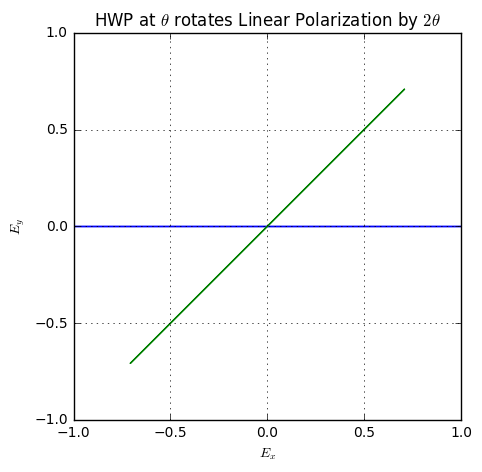

In [2]:
# Example: action of half wave plate on linear polarization
j_h = Jones(1,0)
j_p = j_h.hwp(pi/8)

plot_pols([j_h,j_p])
title('HWP at $\\theta$ rotates Linear Polarization by $2\\theta$')

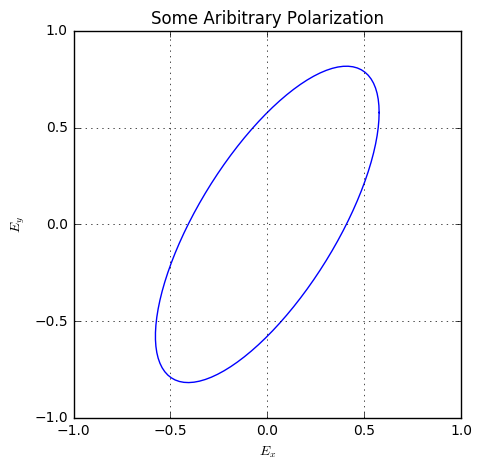

In [3]:
# Example: a field with some arbitrary Jones vector
j = Jones(1,1+1j)
plot_pol(j)
title('Some Aribitrary Polarization')

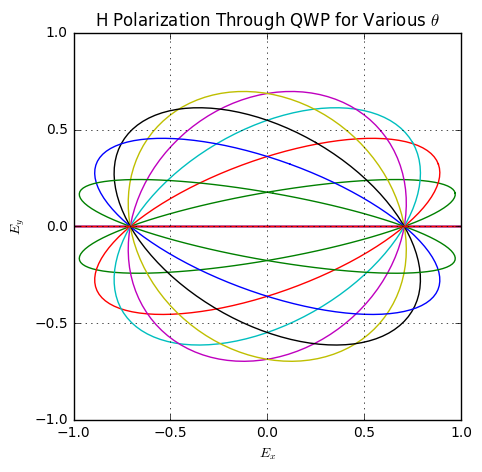

In [4]:
# Example: action of quarter wave plate on linear polarization
j_h = Jones(1,0)

plz = []
thz = linspace(0,pi/2,10)
for t in thz:
    plz = append(plz,j_h.qwp(t))
plot_pols(plz)
title('H Polarization Through QWP for Various $\\theta$')

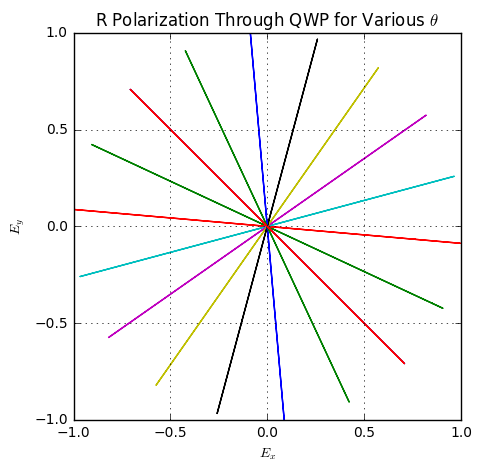

In [5]:
# Example: action of quarter wave plate on circular polarization
j_c = Jones(1,1j)
plz = []
thz = linspace(0,pi,10)
for t in thz:
    plz = append(plz,j_c.qwp(t))
plot_pols(plz)
title('R Polarization Through QWP for Various $\\theta$')